# 실습 2. Fitting #1

이 실습에서는 간단한 신경망이 어느 정도 능력을 가지는지 확인하기 위해, 4차 다항식을 fitting합니다.

### 화면을 전체 폭의 90%로, 최대한 넓게 사용하도록 합니다. 최대 100%까지 설정할 수 있습니다.

In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important;}</style>"))

## 0. 필요한 모듈들을 불러옵니다.
* keras는 Keras 라이브러리로, 바탕에 tensorflow를 사용합니다.
* numpy는 Python용 수학 라이브러리로 행렬 연산 등에 사용하기 편리합니다.
* matplotlib.pyplot는 가장 널리 사용되는 plotting 라이브러리 중 하나입니다.

In [1]:
import keras
import keras.backend as K
import keras.layers as Layers
import numpy as np
from matplotlib import pyplot as plt

Using TensorFlow backend.


## 1. 데이터를 준비합니다.
아래 식을 만족하는 자료 $(x, y)$를 $x \in \left[ -3, 3 \right]$ 구간에서 5000쌍 준비합니다.
$$y = \frac{x^4}{27} - \frac{x^2}{3} + \frac{x}{3}$$

np.random.rand(num_data) 함수는 $[0, 1]$ 사이 임의의 난수를 num_data 개 생성합니다.

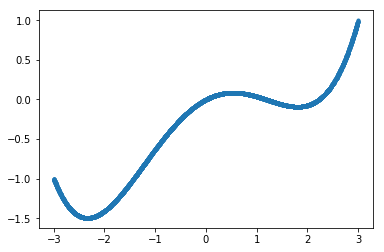

In [2]:
x = np.random.rand(5000) * 6 - 3
y = x ** 4 /27 - x ** 2 / 3 + x / 3
plt.plot(x, y, linestyle='', marker='.')

## 2. 모델을 만듭니다.

모델을 생성하기 위한 코드입니다. 여기서는 dense layer만 사용하는 단순한 모델을 사용합니다.

모델의 입력은 $x$, 출력은 $y$이므로 입력의 shape는 $(1,)$이고 출력단의 cell 개수는 1입니다.

In [3]:
def create_model(layers = [(4, 'tanh'), (8, 'tanh'), (2, 'tanh')], optimizer = 'rmsprop', loss = 'mse', verbose = 1):
    inp = Layers.Input(shape = (1,), name = 'input')
    l1 = inp
    for i, layer in enumerate(layers):
        l1 = Layers.Dense(layer[0], name = 'Dense{}'.format(i + 1))(l1)
        l1 = Layers.Activation(layer[1], name = 'Act{}'.format(i + 1))(l1)
    out = Layers.Dense(1, name = 'output')(l1)
    m = keras.Model(inp, out)
    if verbose == 1:
        m.summary()
    m.compile(optimizer = optimizer, loss = loss)
    
    return m

## 3. 주어진 자료로 모델을 학습시켜봅니다.

* 신경망은 hidden layer를 3개 사용합니다.
    * 첫 번째 hidden layer는 cell이 4개이며 activation function은 tanh입니다.
    * 두 번째 hidden layer는 cell이 8개이며 activation function은 tanh입니다.
    * 세 번째 hidden layer는 cell이 2개이며 activation function은 tanh입니다.
* 그래프 위의 점이 주어지는 것이므로, loss는 MSE로 잡습니다.

* 자료는 50개만 사용해 봅니다.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 1)                 0         
_________________________________________________________________
Dense1 (Dense)               (None, 4)                 8         
_________________________________________________________________
Act1 (Activation)            (None, 4)                 0         
_________________________________________________________________
Dense2 (Dense)               (None, 8)                 40        
_________________________________________________________________
Act2 (Activation)            (None, 8)                 0         
_________________________________________________________________
Dense3 (Dense)               (None, 2)                 18        
_________________________________________________________________
Act3 (Activation)            (None, 2)                 0         
__________

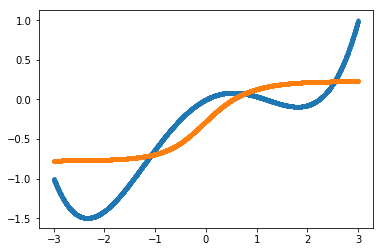

In [4]:
m1 = create_model(layers = [(4, 'tanh'), (8, 'tanh'), (2, 'tanh')], optimizer = 'rmsprop', loss = 'mse')
m1.fit(x[:50], y[:50], epochs=100, shuffle = True, verbose = 1)
y2 = m1.predict(x)
plt.plot(x, y, linestyle='', marker='.')
plt.plot(x, y2, linestyle='', marker='.')

잘 fitting하지 못합니다. 모델을 좀 더 복잡하게 바꿔봅니다.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 1)                 0         
_________________________________________________________________
Dense1 (Dense)               (None, 4)                 8         
_________________________________________________________________
Act1 (Activation)            (None, 4)                 0         
_________________________________________________________________
Dense2 (Dense)               (None, 8)                 40        
_________________________________________________________________
Act2 (Activation)            (None, 8)                 0         
_________________________________________________________________
Dense3 (Dense)               (None, 8)                 72        
_________________________________________________________________
Act3 (Activation)            (None, 8)                 0         
__________

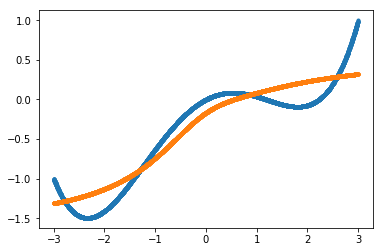

In [5]:
m2 = create_model(layers = [(4, 'tanh'), (8, 'tanh'), (8, 'tanh'), (8, 'tanh')], optimizer = 'rmsprop', loss = 'mse')
m2.fit(x[:50], y[:50], epochs=100, shuffle = True, verbose = 0)
y2 = m2.predict(x)
plt.plot(x, y, linestyle='', marker='.')
plt.plot(x, y2, linestyle='', marker='.')

## 4. 다양한 모델과 학습자료에 대해 학습 결과물을 비교합니다.


이것도 별로니까 모델을 더 키워봅니다.

아울러 자료가 너무 적은 것이 문제일 수도 있으니까, 자료 양도 50, 500, 1000, 5000개로 늘려봅니다.

아래 코드는 이런 여러 가지 모델과 자료량에 대해 학습한 결과 평가(학습 자료로 그려지는 그래프와, 학습한 모델로 추정한 결과로 그려지는 그래프를 동시에 표시)를 하나의 그림으로 나타냅니다.

['tiny', (4, 'tanh')] 50
['tiny', (4, 'tanh')] 500
['tiny', (4, 'tanh')] 1000
['tiny', (4, 'tanh')] 5000
['small', (4, 'tanh'), (8, 'tanh')] 50
['small', (4, 'tanh'), (8, 'tanh')] 500
['small', (4, 'tanh'), (8, 'tanh')] 1000
['small', (4, 'tanh'), (8, 'tanh')] 5000
['medium', (4, 'tanh'), (8, 'tanh'), (8, 'tanh')] 50
['medium', (4, 'tanh'), (8, 'tanh'), (8, 'tanh')] 500
['medium', (4, 'tanh'), (8, 'tanh'), (8, 'tanh')] 1000
['medium', (4, 'tanh'), (8, 'tanh'), (8, 'tanh')] 5000
['large', (4, 'tanh'), (8, 'tanh'), (8, 'tanh'), (8, 'tanh')] 50
['large', (4, 'tanh'), (8, 'tanh'), (8, 'tanh'), (8, 'tanh')] 500
['large', (4, 'tanh'), (8, 'tanh'), (8, 'tanh'), (8, 'tanh')] 1000
['large', (4, 'tanh'), (8, 'tanh'), (8, 'tanh'), (8, 'tanh')] 5000


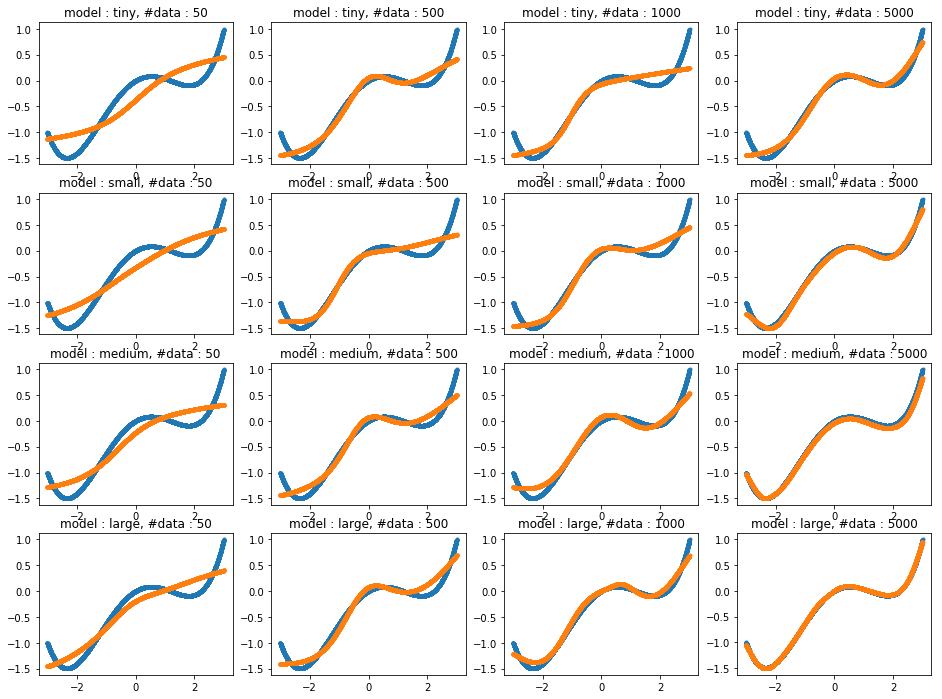

In [6]:
set_layers = [
    ['tiny', (4, 'tanh')],
    ['small', (4, 'tanh'), (8, 'tanh')],
    ['medium', (4, 'tanh'), (8, 'tanh'), (8, 'tanh')],
    ['large', (4, 'tanh'), (8, 'tanh'), (8, 'tanh'), (8, 'tanh')],
]
set_numdata = [50, 500, 1000, 5000]
epochs = 100

fig = plt.subplots(len(set_layers), len(set_numdata), figsize = (16, 12))

for i, layers in enumerate(set_layers):
    for j, numdata in enumerate(set_numdata):
        print(layers, numdata)
        subfig = fig[1][i][j]
        m = create_model(layers = layers[1:], optimizer = 'rmsprop', loss = 'mse', verbose = 0)
        m.fit(x[:numdata], y[:numdata], epochs=epochs, shuffle = True, verbose = 0)
        y2 = m.predict(x)
        subfig.plot(x, y, linestyle='', marker='.')
        subfig.plot(x, y2, linestyle='', marker='.')
        subfig.set_title('model : {}, #data : {}'.format(layers[0], numdata))


모델이 복잡한 것도 중요하지만, 자료량이 많은 것 또한 중요합니다.

이제, 앞서 activation function을 다양하게 쓸 수 있다고 했으니 relu로 바꿔봅니다.

['tiny_r', (4, 'relu')] 50
['tiny_r', (4, 'relu')] 500
['tiny_r', (4, 'relu')] 1000
['tiny_r', (4, 'relu')] 5000
['small_r', (4, 'relu'), (8, 'relu')] 50
['small_r', (4, 'relu'), (8, 'relu')] 500
['small_r', (4, 'relu'), (8, 'relu')] 1000
['small_r', (4, 'relu'), (8, 'relu')] 5000
['medium_r', (4, 'relu'), (8, 'relu'), (8, 'relu')] 50
['medium_r', (4, 'relu'), (8, 'relu'), (8, 'relu')] 500
['medium_r', (4, 'relu'), (8, 'relu'), (8, 'relu')] 1000
['medium_r', (4, 'relu'), (8, 'relu'), (8, 'relu')] 5000
['large_r', (4, 'relu'), (8, 'relu'), (8, 'relu'), (8, 'relu')] 50
['large_r', (4, 'relu'), (8, 'relu'), (8, 'relu'), (8, 'relu')] 500
['large_r', (4, 'relu'), (8, 'relu'), (8, 'relu'), (8, 'relu')] 1000
['large_r', (4, 'relu'), (8, 'relu'), (8, 'relu'), (8, 'relu')] 5000


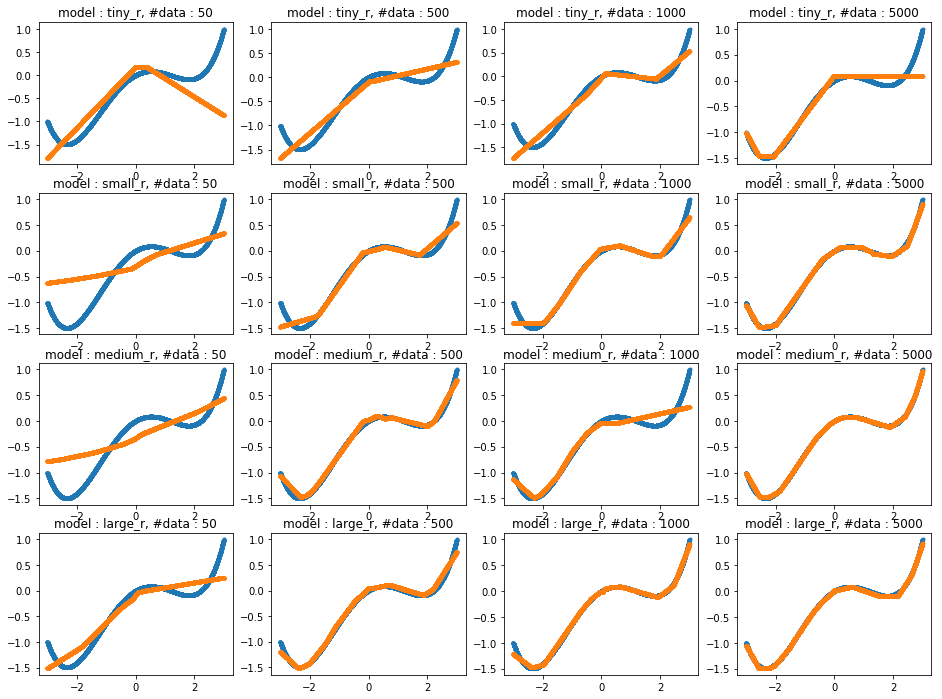

In [7]:
set_layers = [
    ['tiny_r', (4, 'relu')],
    ['small_r', (4, 'relu'), (8, 'relu')],
    ['medium_r', (4, 'relu'), (8, 'relu'), (8, 'relu')],
    ['large_r', (4, 'relu'), (8, 'relu'), (8, 'relu'), (8, 'relu')],
]
set_numdata = [50, 500, 1000, 5000]
epochs = 100

fig = plt.subplots(len(set_layers), len(set_numdata), figsize = (16, 12))

for i, layers in enumerate(set_layers):
    for j, numdata in enumerate(set_numdata):
        print(layers, numdata)
        subfig = fig[1][i][j]
        m = create_model(layers = layers[1:], optimizer = 'rmsprop', loss = 'mse', verbose = 0)
        m.fit(x[:numdata], y[:numdata], epochs=epochs, shuffle = True, verbose = 0)
        y2 = m.predict(x)
        subfig.plot(x, y, linestyle='', marker='.')
        subfig.plot(x, y2, linestyle='', marker='.')
        subfig.set_title('model : {}, #data : {}'.format(layers[0], numdata))


relu쪽이 더 나은 것을 알 수 있습니다.

일반적인 경우에는 relu가 더 좋은 성능을 보이지만 항상 그런 것은 아니며 다음 사항을 반드시 고려해야 합니다.

* relu의 출력범위는 $[0, \infty ]$이며, relu는 기본적으로 선형 함수입니다.
    * 음의 출력값이 필요한 경우 leaky relu를 사용할 수 있습니다.
    
* tanh의 출력범위는 $(-1, 1)$이며 tanh는 비선형 함수입니다.

따라서 모델을 설계할 때 각 계층 사이를 오갈 값으로 어떤 것이 적당한지 생각해 보는 것이 좋습니다.

* 참고 : batch normalization

## 4. 이번엔 반원이다.

데이터만 반원 위의 점들로 바꿔봤습니다. 위 예제와 큰 차이는 없으니 이건 시간 날 때 해 보면 됩니다.

In [ ]:
theta = np.random.rand(5000) * np.pi
x = np.cos(theta)
y = np.sin(theta)
plt.plot(x, y, linestyle='', marker='.')

In [ ]:
set_layers = [
    ['tiny', (4, 'tanh')],
    ['small', (4, 'tanh'), (8, 'tanh')],
    ['medium', (4, 'tanh'), (8, 'tanh'), (8, 'tanh')],
    ['large', (4, 'tanh'), (8, 'tanh'), (8, 'tanh'), (8, 'tanh')],
]
set_numdata = [50, 500, 1000]
epochs = 100

fig = plt.subplots(len(set_layers), len(set_numdata), figsize = (16, 12))

for i, layers in enumerate(set_layers):
    for j, numdata in enumerate(set_numdata):
        print(layers, numdata)
        subfig = fig[1][i][j]
        m = create_model(layers = layers[1:], optimizer = 'rmsprop', loss = 'mse', verbose = 0)
        m.fit(x[:numdata], y[:numdata], epochs=epochs, shuffle = True, verbose = 0)
        y2 = m.predict(x)
        subfig.plot(x, y, linestyle='', marker='.')
        subfig.plot(x, y2, linestyle='', marker='.')
        subfig.set_title('model : {}, #data : {}'.format(layers[0], numdata))

In [ ]:
set_layers = [
    ['tiny_r', (4, 'relu')],
    ['small_r', (4, 'relu'), (8, 'relu')],
    ['medium_r', (4, 'relu'), (8, 'relu'), (8, 'relu')],
    ['large_r', (4, 'relu'), (8, 'relu'), (8, 'relu'), (8, 'relu')],
]
set_numdata = [50, 500, 1000, 5000]
epochs = 100

fig = plt.subplots(len(set_layers), len(set_numdata), figsize = (16, 12))

for i, layers in enumerate(set_layers):
    for j, numdata in enumerate(set_numdata):
        print(layers, numdata)
        subfig = fig[1][i][j]
        m = create_model(layers = layers[1:], optimizer = 'rmsprop', loss = 'mse', verbose = 0)
        m.fit(x[:numdata], y[:numdata], epochs=epochs, shuffle = True, verbose = 0)
        y2 = m.predict(x)
        subfig.plot(x, y, linestyle='', marker='.')
        subfig.plot(x, y2, linestyle='', marker='.')
        subfig.set_title('model : {}, #data : {}'.format(layers[0], numdata))
